In [1]:
pip install python-docx

     |████████████████████████████████| 5.6 MB 6.7 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=48b0b0c57ea131ab78f82e0317df6ef824a24af593ae7c9eca10e77614ea7ad1
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [2]:
import docx

import glob
import re
import pandas as pd
#from yattag import Doc
import unicodedata
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [3]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return fullText


In [4]:
texto = getText('dodf43-62.docx')
for txt in texto:
  print(txt)

EXTRATO DO CONTRATO Nº 10/2013. Processo 040.004.068/2012 - Partes: DF/SEF X ORACLE DO BRASIL SISTEMAS LTDA. Objeto: O Contrato tem por objeto a prestação de serviços a serem executados de forma contínua, correspondentes a suporte técnico remoto 24x7 (24 horas por dia, sete dias por semana) para os softwares da ORACLE, com atualização dos softwares, de acordo com o Projeto Básico, fls. (290 a 300), o Parecer nº 1.323/2012 - PROCAD/PGDF, fls.(333 a 357), os despachos de reconhecimento fls. (423) e de ratificação da inexigibilidade de licitação fl. (413) e a Proposta da ORACLE fls. (454 a 492). Valor: O valor total do Contrato é de R$ 2.703.443,58 (dois milhões, setecentos e três mil, quatrocentos e quarenta e três reais e cinquenta e oito centavos), devendo a importância de R$ 2.252.869,65 (dois milhões, duzentos e cinquenta e dois mil, oitocentos e sessenta e nove reais e sessenta e cinco centavos) ser atendida à conta de dotações orçamentárias consignadas no orçamento corrente – Lei O

In [5]:
regex_contrato = 'EXTRATO DO CONTRATO ([^.]*)'
df_dict=[]

# txt=str(txt).strip('[]')

for txt in texto:
  #print(txt)
  match = re.search(regex_contrato, txt, re.IGNORECASE)
  if match:
      df_dict.append(match.group(0))
  else:
      df_dict.append(np.nan)
    
print(df_dict)    

['EXTRATO DO CONTRATO Nº 10/2013', 'EXTRATO DO CONTRATO Nº 11/2013', 'EXTRATO DO CONTRATO Nº 38/2013', 'EXTRATO DO CONTRATO Nº 39/2013', 'EXTRATO DO CONTRATO Nº 13/2014-SEF PROCESSO N', nan, 'EXTRATO DO CONTRATO Nº 04/2014', 'EXTRATO DO CONTRATO Nº 05/2014', 'EXTRATO DO CONTRATO Nº 60/2017 PROCESSO SEI nº 040', 'EXTRATO DO CONTRATO Nº 48/2017 PROCESSO SEI nº 040', 'EXTRATO DO CONTRATO Nº 51/2015', 'EXTRATO DO CONTRATO Nº 52/2016', 'EXTRATO DO CONTRATO Nº 044/2015', 'EXTRATO DO CONTRATO Nº 016/2016', 'EXTRATO DO CONTRATO Nº 79/2017 PROCESSO: 00040-00054001/2017-81 - DAS PARTES: SEF/DF X BSB TIC SOLUÇÕES LTDA - EPP', 'EXTRATO DO CONTRATO Nº 61/2017 PROCESSO: 040', nan, 'EXTRATO DO CONTRATO Nº 40/2017 PROCESSO SEI Nº 040']


In [21]:
regex_dict = {
    'contrato': 'EXTRATO DO CONTRATO ([^.]*)',  # Numero do ajuste
    'partes': 'Partes: ([^.]*)',  # Orgao contratante/ entidade contratada
    # Entidade convenetes???
    'processo': 'Processo[\s\S]*(\d{3}.\d{3}/\d{4}?)',  # Processo no GDF
    # 'processo': 'Processo[\s\S]*(\d{3}.\d{6}/\d{4}?)|(\d{5}[\.|\-]\d{8}\/\d{4}-\d{2})|(\d{5}[\.|\-]\d{8}\/\d{4}-\d{2})', # outros formatos de processos
    'objeto': 'Objeto: ([^.]*)',  # Objeto do ajuste
    'data_ass': 'Data da Assinatura:[\s\S](\d{2}/\d{2}/\d{2}?)',  # Data
    'vigencia': 'Vigência[\s\S]([^,]*)([^,]*)',  # Vigencia do ajuste
    'valor': 'Valor: ([^(]*)',  # Valor do ajuste
    # Dotacao orcamenteria com: Unidade Orçamentária
    'uni_orc': 'Unidade Orçamentária:[\s\S]([^;]*)',
    'prog_trab': 'Programa de Trabalho:[\s\S]([^;]*)',  # Programa de Trabalho
    'nat_desp': 'Natureza da Despesa:[\s\S]([^;]*)',  # Natureza da Despesa
    'nota_emp': 'Nota de Empenho: ([^;]*)',  # Nota de Empenho (nao tem)

    # Quando contrato decorrente de licitação:
    # orgão licitante
    # numero da licitação
    # quando o ontrato pe decorrente de adesão Arp:
    # Orgão gerenciador da ATA
    # UF do OG
    # numero do edital do OG
    # Ano o edital do OG
    # Quando o contrato decorrente de dispensa o inexigibilidade:
    # Fundamento lega da dispensa ou inexigibilidade
    # Caso o fundamento legal não seja informado, indentificar se foi dispensa de licitação ou inexigibilidade

}

df_dict = {
    'contrato': [],
    'partes': [],
    'processo': [],
    'data_ass': [],
    'objeto': [],
    'vigencia': [],
    'valor': [],
    'uni_orc': [],
    'prog_trab': [],
    'nat_desp': [],
    'nota_emp': [],

}


for txt in texto:
    for field in regex_dict:
        match = re.search(regex_dict[field], txt, re.IGNORECASE)
        if match:
            # pega sem as palavras usadas como parametros de extraçao
            res = tuple(x for x in match.groups() if x is not None)
            df_dict[field].append(res[0])
            # df_dict[field].append(match.group(0)) #pega com as palavras usadas como parametros de extraçao junto
        else:
            df_dict[field].append(np.nan)

for field in df_dict:
    print(field, "->", df_dict[field])


df = pd.DataFrame.from_dict(df_dict)
df.to_csv('abertura_regex.csv')
df


contrato -> ['Nº 10/2013', 'Nº 11/2013', 'Nº 38/2013', 'Nº 39/2013', 'Nº 13/2014-SEF PROCESSO N', nan, 'Nº 04/2014', 'Nº 05/2014', 'Nº 60/2017 PROCESSO SEI nº 040', 'Nº 48/2017 PROCESSO SEI nº 040', 'Nº 51/2015', 'Nº 52/2016', 'Nº 044/2015', 'Nº 016/2016', 'Nº 79/2017 PROCESSO: 00040-00054001/2017-81 - DAS PARTES: SEF/DF X BSB TIC SOLUÇÕES LTDA - EPP', 'Nº 61/2017 PROCESSO: 040', nan, 'Nº 40/2017 PROCESSO SEI Nº 040']
partes -> ['DF/SEF X ORACLE DO BRASIL SISTEMAS LTDA', 'DF/SEF X ORACLE DO BRASIL SISTEMAS LTDA', 'DF/SEF x PAULISTA SERVIÇOS E TRANSPORTES LTDA', 'DF/SEF x PAULISTA SERVIÇOS E TRANSPORTES LTDA', 'DF/SEF X', 'DF/SEF X EMIBM ENGENHARIA E COMÉRCIO LTDA', 'DF/SEF X Serviço Federal de Processamento de Dados – SERPRO', 'DF/SEF X empresa HBL – CARIMBOS E PLACAS INDÚSTRIA E COMÉRCIO LTDA - ME', 'SEF X ALSAR TECNOLOGIA EM REDES LTDA', 'SEF X FINO SABOR INDÚSTRIA E COMÉRCIO LTDA', 'DF/SEF X CAIXA ECONÔMICA FEDERAL', 'DF/SEF X BANCO CITIBANK S', 'DF/SEF X Banco do Brasil S/A', 'DF/S

,contrato,partes,processo,data_ass,objeto,vigencia,valor,uni_orc,prog_trab,nat_desp,nota_emp
0,Nº 10/2013,DF/SEF X ORACLE DO BRASIL SISTEMAS LTDA,004.068/2012,25/02/20,O Contrato tem por objeto a prestação de servi...,NaN,"O valor total do Contrato é de R$ 2.703.443,58",19101,"04.126.6203.1471.0012, Natureza da Despesa: 33...",339039,NaN
1,Nº 11/2013,DF/SEF X ORACLE DO BRASIL SISTEMAS LTDA,003.743/2011,25/02/20,O Contrato tem por objeto a prestação de servi...,NaN,"O valor total do Contrato é de R$ 120.788,12",19101,"04126620325570007, Natureza da Despesa: 339039",339039,NaN
2,Nº 38/2013,DF/SEF x PAULISTA SERVIÇOS E TRANSPORTES LTDA,001.626/2013,09/07/20,O Contrato tem por objeto a contratação de emp...,O contrato terá vigência de 12 (doze) meses,"O valor total do Contrato é de R$ 920.725,56",130103,04122.6003.8517.0051,33.90.37,NaN
3,Nº 39/2013,DF/SEF x PAULISTA SERVIÇOS E TRANSPORTES LTDA,001.797/2013,09/07/20,O Contrato tem por objeto a contratação de emp...,O contrato terá vigência de 12 (doze) meses,"O valor total do Contrato é de R$ 635.528,40",130103,04122.6003.8517.0051,33.90.37,NaN
4,Nº 13/2014-SEF PROCESSO N,DF/SEF X,000.392/2014,18/03/20,O Contrato tem por objeto a contratação de emp...,O contrato terá vigência de 30 (trinta) meses,"O valor total do Contrato é de R$ 2.187.000,00",19101,NaN,339039,NaN
5,NaN,DF/SEF X EMIBM ENGENHARIA E COMÉRCIO LTDA,003.563/2013,18/03/20,O Termo Aditivo objetiva a alteração contratua...,O presente Termo Aditivo entra em vigência a ...,O valor total desta prorrogação é de R$ 1.500....,NaN,NaN,NaN,NaN
6,Nº 04/2014,DF/SEF X Serviço Federal de Processamento de D...,000.460/2012,31/01/20,Prestação de serviços a serem executados de fo...,O contrato terá vigência de 12 (doze) meses,"O valor total do contrato é de R$ 1.041.664,46",130103,NaN,339039,NaN
7,Nº 05/2014,DF/SEF X empresa HBL – CARIMBOS E PLACAS INDÚS...,004.270/2013,31/01/20,Contratação de empresa especializada no fornec...,O contrato terá vigência de 12 (doze) meses,"O valor total do Contrato é de R$ 29.387,00",19101,NaN,339030 e 339030,NaN
8,Nº 60/2017 PROCESSO SEI nº 040,SEF X ALSAR TECNOLOGIA EM REDES LTDA,0056829/2017,31/08/20,NaN,O Contrato terá vigência de 60 (sessenta) meses,"O valor total do contrato é de R$ 280.124,00",19101. Natureza da Despesa: 44.90.39,04122620331020001. Unidade Orçamentária: 19101...,44.90.39,NaN
9,Nº 48/2017 PROCESSO SEI nº 040,SEF X FINO SABOR INDÚSTRIA E COMÉRCIO LTDA,0055911/2017,31/08/20,NaN,O Contrato terá vigência de 12 (doze) meses,"O valor total do Contrato é de R$ 28.364,00",19101. Natureza da Despesa: 33.90.30,04122600385170051 Unidade Orçamentária: 19101....,33.90.30,NaN


In [15]:
def pizza_plots(df, dim1, dim2):
    _, ax = plt.subplots(dim1, dim2, figsize=(15,15))
    cor = ['#1b9aaa', '#06d6a0']

    i = 0
    print(df.columns)
    df_aux = pd.DataFrame()
    dict_aux = {}
    for id in df.columns:
        total = len(df)
        aparicoes = df[id].count()
        labels = ["Com " + str(id), "Sem " + str(id)]
#         dict_aux[id] = total - aparicoes
        size = [aparicoes, total - aparicoes]
        ax[math.floor(i/2), i%2].pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
        ax[math.floor(i/2), i%2].legend(labels, title="Presença", loc='center left', bbox_to_anchor=(1.3, 0, 0.5, 1))
        ax[math.floor(i/2), i%2].axis('off')
        i+=1

#     df_aux = pd.DataFrame(dict_aux)
    plt.show()


Index(['contrato', 'partes', 'processo', 'data_ass', 'objeto', 'vigencia',
       'valor', 'uni_orc', 'prog_trab', 'nat_desp', 'nota_emp'],
      dtype='object')


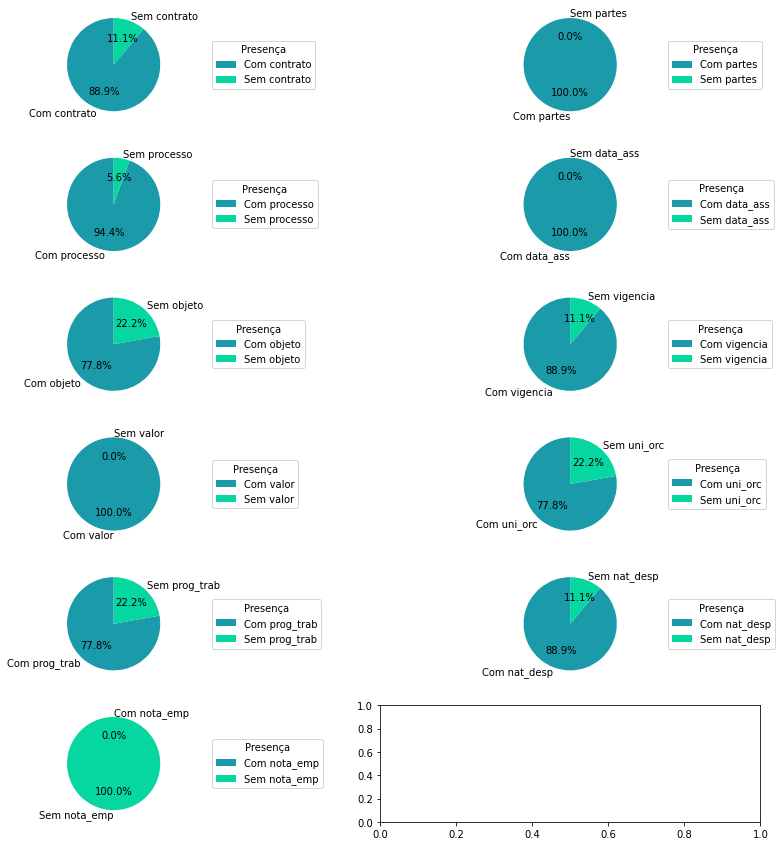

In [17]:
pizza_plots(df, 6, 2)